## Analysis of the impact of coronary disease on COVID-19 mortality in middle-aged people. ##

### Importing Libraries

In [1]:
import pandas as pd
import calendar
import seaborn as sns
import matplotlib.pyplot as plt

### Reading data

In [2]:
df = pd.read_csv("covheartdata.csv")

In [3]:
df.head()

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
0,09/24/2023,01/01/2020,09/23/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,1569.0,1647.0,NaN
1,09/24/2023,01/01/2020,09/23/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,5804.0,6029.0,NaN
2,09/24/2023,01/01/2020,09/23/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,15080.0,15699.0,NaN
3,09/24/2023,01/01/2020,09/23/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,37414.0,38878.0,NaN
4,09/24/2023,01/01/2020,09/23/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,82668.0,85708.0,NaN


### Checking for null values in the data

In [4]:
print(df.isnull().sum())

Data As Of                 0
Start Date                 0
End Date                   0
Group                      0
Year                   12420
Month                  62100
State                      0
Condition Group            0
Condition                  0
ICD10_codes                0
Age Group                  0
COVID-19 Deaths       183449
Number of Mentions    177577
Flag                  437551
dtype: int64


### Checking the datatypes and changing the date columns to type 'datetime'

In [5]:
df.dtypes

Data As Of             object
Start Date             object
End Date               object
Group                  object
Year                  float64
Month                 float64
State                  object
Condition Group        object
Condition              object
ICD10_codes            object
Age Group              object
COVID-19 Deaths       float64
Number of Mentions    float64
Flag                   object
dtype: object

In [6]:
df['Data As Of'] = pd.to_datetime(df['Data As Of'])
df['Start Date'] = pd.to_datetime(df['Start Date'])
df['End Date'] = pd.to_datetime(df['End Date'])

In [7]:
df.dtypes

Data As Of            datetime64[ns]
Start Date            datetime64[ns]
End Date              datetime64[ns]
Group                         object
Year                         float64
Month                        float64
State                         object
Condition Group               object
Condition                     object
ICD10_codes                   object
Age Group                     object
COVID-19 Deaths              float64
Number of Mentions           float64
Flag                          object
dtype: object

In [8]:
df.Month.unique()

array([nan,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.])

In [9]:
df.Year.unique()

array([  nan, 2020., 2021., 2022., 2023.])

In [10]:
df.State.unique()

array(['United States', 'Alabama', 'Alaska', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'New York City', 'North Carolina', 'North Dakota', 'Ohio',
       'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin',
       'Wyoming', 'Puerto Rico'], dtype=object)

In [11]:
df.Flag.unique()

array([nan,
       'One or more data cells have counts between 1-9 and have been suppressed in accordance with NCHS confidentiality standards.'],
      dtype=object)

In [12]:
df.head()

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
0,2023-09-24,2020-01-01,2023-09-23,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,1569.0,1647.0,NaN
1,2023-09-24,2020-01-01,2023-09-23,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,5804.0,6029.0,NaN
2,2023-09-24,2020-01-01,2023-09-23,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,15080.0,15699.0,NaN
3,2023-09-24,2020-01-01,2023-09-23,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,37414.0,38878.0,NaN
4,2023-09-24,2020-01-01,2023-09-23,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,82668.0,85708.0,NaN


### Creating a copy of the dataframe

In [13]:
temp = df

In [14]:
temp.head()

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
0,2023-09-24,2020-01-01,2023-09-23,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,1569.0,1647.0,NaN
1,2023-09-24,2020-01-01,2023-09-23,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,5804.0,6029.0,NaN
2,2023-09-24,2020-01-01,2023-09-23,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,15080.0,15699.0,NaN
3,2023-09-24,2020-01-01,2023-09-23,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,37414.0,38878.0,NaN
4,2023-09-24,2020-01-01,2023-09-23,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,82668.0,85708.0,NaN


### Dropping columns 'Flag', and 'Number of Mentions'

In [15]:
temp.drop(['Flag', 'Number of Mentions'], axis=1)

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths
0,2023-09-24,2020-01-01,2023-09-23,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,1569.0
1,2023-09-24,2020-01-01,2023-09-23,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,5804.0
2,2023-09-24,2020-01-01,2023-09-23,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,15080.0
3,2023-09-24,2020-01-01,2023-09-23,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,37414.0
4,2023-09-24,2020-01-01,2023-09-23,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,82668.0
...,...,...,...,...,...,...,...,...,...,...,...,...
620995,2023-09-24,2023-05-01,2023-05-31,By Month,2023.0,5.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,67.0
620996,2023-09-24,2023-06-01,2023-06-30,By Month,2023.0,6.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,122.0
620997,2023-09-24,2023-07-01,2023-07-31,By Month,2023.0,7.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,114.0
620998,2023-09-24,2023-08-01,2023-08-31,By Month,2023.0,8.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,78.0


### Filtering the columns according to the 'Condition' field and selecting only the cardiovascular conditions along with COVID-19

In [16]:
temp = temp[temp['Condition'].isin(['COVID-19','Cardiac arrest', 'Ischemic heart disease', 'Cardiac arrhythmia', 'Heart failure', 'Other diseases of the circulatory system'])]

In [17]:
temp.head()

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
70,2023-09-24,2020-01-01,2023-09-23,By Total,NaN,NaN,United States,Circulatory diseases,Ischemic heart disease,I20-I25,0-24,33.0,35.0,NaN
71,2023-09-24,2020-01-01,2023-09-23,By Total,NaN,NaN,United States,Circulatory diseases,Ischemic heart disease,I20-I25,25-34,289.0,307.0,NaN
72,2023-09-24,2020-01-01,2023-09-23,By Total,NaN,NaN,United States,Circulatory diseases,Ischemic heart disease,I20-I25,35-44,1106.0,1202.0,NaN
73,2023-09-24,2020-01-01,2023-09-23,By Total,NaN,NaN,United States,Circulatory diseases,Ischemic heart disease,I20-I25,45-54,4131.0,4447.0,NaN
74,2023-09-24,2020-01-01,2023-09-23,By Total,NaN,NaN,United States,Circulatory diseases,Ischemic heart disease,I20-I25,55-64,13281.0,14423.0,NaN


In [18]:
len(temp.axes[0])

162000

In [19]:
temp = temp.drop(['Flag', 'Number of Mentions'], axis=1)

In [20]:
temp.head()

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths
70,2023-09-24,2020-01-01,2023-09-23,By Total,NaN,NaN,United States,Circulatory diseases,Ischemic heart disease,I20-I25,0-24,33.0
71,2023-09-24,2020-01-01,2023-09-23,By Total,NaN,NaN,United States,Circulatory diseases,Ischemic heart disease,I20-I25,25-34,289.0
72,2023-09-24,2020-01-01,2023-09-23,By Total,NaN,NaN,United States,Circulatory diseases,Ischemic heart disease,I20-I25,35-44,1106.0
73,2023-09-24,2020-01-01,2023-09-23,By Total,NaN,NaN,United States,Circulatory diseases,Ischemic heart disease,I20-I25,45-54,4131.0
74,2023-09-24,2020-01-01,2023-09-23,By Total,NaN,NaN,United States,Circulatory diseases,Ischemic heart disease,I20-I25,55-64,13281.0


In [21]:
print(temp.isnull().sum())

Data As Of             0
Start Date             0
End Date               0
Group                  0
Year                3240
Month              16200
State                  0
Condition Group        0
Condition              0
ICD10_codes            0
Age Group              0
COVID-19 Deaths    48017
dtype: int64


### Filtering by State - 'Maryland'

In [22]:
temp[temp['State'] == 'Maryland']

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths
4900,2023-09-24,2020-01-01,2023-09-23,By Total,NaN,NaN,Maryland,Circulatory diseases,Ischemic heart disease,I20-I25,0-24,0.0
4901,2023-09-24,2020-01-01,2023-09-23,By Total,NaN,NaN,Maryland,Circulatory diseases,Ischemic heart disease,I20-I25,25-34,NaN
4902,2023-09-24,2020-01-01,2023-09-23,By Total,NaN,NaN,Maryland,Circulatory diseases,Ischemic heart disease,I20-I25,35-44,10.0
4903,2023-09-24,2020-01-01,2023-09-23,By Total,NaN,NaN,Maryland,Circulatory diseases,Ischemic heart disease,I20-I25,45-54,77.0
4904,2023-09-24,2020-01-01,2023-09-23,By Total,NaN,NaN,Maryland,Circulatory diseases,Ischemic heart disease,I20-I25,55-64,221.0
...,...,...,...,...,...,...,...,...,...,...,...,...
289795,2023-09-24,2023-05-01,2023-05-31,By Month,2023.0,5.0,Maryland,COVID-19,COVID-19,U071,All Ages,43.0
289796,2023-09-24,2023-06-01,2023-06-30,By Month,2023.0,6.0,Maryland,COVID-19,COVID-19,U071,All Ages,40.0
289797,2023-09-24,2023-07-01,2023-07-31,By Month,2023.0,7.0,Maryland,COVID-19,COVID-19,U071,All Ages,35.0
289798,2023-09-24,2023-08-01,2023-08-31,By Month,2023.0,8.0,Maryland,COVID-19,COVID-19,U071,All Ages,80.0


In [23]:

temp['Month'] = temp['Month'].apply(lambda x: calendar.month_name[int(x)] if not pd.isnull(x) else x)

In [24]:
temp[temp['State'] == 'Maryland']

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths
4900,2023-09-24,2020-01-01,2023-09-23,By Total,NaN,NaN,Maryland,Circulatory diseases,Ischemic heart disease,I20-I25,0-24,0.0
4901,2023-09-24,2020-01-01,2023-09-23,By Total,NaN,NaN,Maryland,Circulatory diseases,Ischemic heart disease,I20-I25,25-34,NaN
4902,2023-09-24,2020-01-01,2023-09-23,By Total,NaN,NaN,Maryland,Circulatory diseases,Ischemic heart disease,I20-I25,35-44,10.0
4903,2023-09-24,2020-01-01,2023-09-23,By Total,NaN,NaN,Maryland,Circulatory diseases,Ischemic heart disease,I20-I25,45-54,77.0
4904,2023-09-24,2020-01-01,2023-09-23,By Total,NaN,NaN,Maryland,Circulatory diseases,Ischemic heart disease,I20-I25,55-64,221.0
...,...,...,...,...,...,...,...,...,...,...,...,...
289795,2023-09-24,2023-05-01,2023-05-31,By Month,2023.0,May,Maryland,COVID-19,COVID-19,U071,All Ages,43.0
289796,2023-09-24,2023-06-01,2023-06-30,By Month,2023.0,June,Maryland,COVID-19,COVID-19,U071,All Ages,40.0
289797,2023-09-24,2023-07-01,2023-07-31,By Month,2023.0,July,Maryland,COVID-19,COVID-19,U071,All Ages,35.0
289798,2023-09-24,2023-08-01,2023-08-31,By Month,2023.0,August,Maryland,COVID-19,COVID-19,U071,All Ages,80.0


In [25]:
temp.Group.unique()

array(['By Total', 'By Year', 'By Month'], dtype=object)

In [26]:
temp['Age Group'].unique()

array(['0-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84',
       '85+', 'Not stated', 'All Ages'], dtype=object)

In [27]:
df['Condition Group'].unique()

array(['Respiratory diseases', 'Circulatory diseases', 'Sepsis',
       'Malignant neoplasms', 'Diabetes', 'Obesity', 'Alzheimer disease',
       'Vascular and unspecified dementia', 'Renal failure',
       'Intentional and unintentional injury, poisoning, and other adverse events',
       'All other conditions and causes (residual)', 'COVID-19'],
      dtype=object)

In [28]:
temp2=df

In [29]:
temp2.head()

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
0,2023-09-24,2020-01-01,2023-09-23,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,1569.0,1647.0,NaN
1,2023-09-24,2020-01-01,2023-09-23,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,5804.0,6029.0,NaN
2,2023-09-24,2020-01-01,2023-09-23,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,15080.0,15699.0,NaN
3,2023-09-24,2020-01-01,2023-09-23,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,37414.0,38878.0,NaN
4,2023-09-24,2020-01-01,2023-09-23,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,82668.0,85708.0,NaN


In [30]:
temp2 = temp2[temp2['Condition Group'].isin(['Circulatory diseases','COVID-19'])]

In [31]:
temp2.head()

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
60,2023-09-24,2020-01-01,2023-09-23,By Total,NaN,NaN,United States,Circulatory diseases,Hypertensive diseases,I10-I15,0-24,105.0,105.0,NaN
61,2023-09-24,2020-01-01,2023-09-23,By Total,NaN,NaN,United States,Circulatory diseases,Hypertensive diseases,I10-I15,25-34,903.0,914.0,NaN
62,2023-09-24,2020-01-01,2023-09-23,By Total,NaN,NaN,United States,Circulatory diseases,Hypertensive diseases,I10-I15,35-44,3656.0,3685.0,NaN
63,2023-09-24,2020-01-01,2023-09-23,By Total,NaN,NaN,United States,Circulatory diseases,Hypertensive diseases,I10-I15,45-54,10676.0,10766.0,NaN
64,2023-09-24,2020-01-01,2023-09-23,By Total,NaN,NaN,United States,Circulatory diseases,Hypertensive diseases,I10-I15,55-64,27207.0,27442.0,NaN


In [32]:
temp2['Condition'].unique()

array(['Hypertensive diseases', 'Ischemic heart disease',
       'Cardiac arrest', 'Cardiac arrhythmia', 'Heart failure',
       'Cerebrovascular diseases',
       'Other diseases of the circulatory system', 'COVID-19'],
      dtype=object)

In [33]:
len(temp2.axes[0])

216000

In [34]:
temp2 = temp2.drop(['Flag', 'Number of Mentions'], axis=1)

In [35]:
temp2.head()

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths
60,2023-09-24,2020-01-01,2023-09-23,By Total,NaN,NaN,United States,Circulatory diseases,Hypertensive diseases,I10-I15,0-24,105.0
61,2023-09-24,2020-01-01,2023-09-23,By Total,NaN,NaN,United States,Circulatory diseases,Hypertensive diseases,I10-I15,25-34,903.0
62,2023-09-24,2020-01-01,2023-09-23,By Total,NaN,NaN,United States,Circulatory diseases,Hypertensive diseases,I10-I15,35-44,3656.0
63,2023-09-24,2020-01-01,2023-09-23,By Total,NaN,NaN,United States,Circulatory diseases,Hypertensive diseases,I10-I15,45-54,10676.0
64,2023-09-24,2020-01-01,2023-09-23,By Total,NaN,NaN,United States,Circulatory diseases,Hypertensive diseases,I10-I15,55-64,27207.0


In [36]:
temp2[temp2['Group'] == 'By Month']

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths
64800,2023-09-24,2020-01-01,2020-01-31,By Month,2020.0,1.0,United States,Circulatory diseases,Hypertensive diseases,I10-I15,0-24,0.0
64801,2023-09-24,2020-02-01,2020-02-29,By Month,2020.0,2.0,United States,Circulatory diseases,Hypertensive diseases,I10-I15,0-24,0.0
64802,2023-09-24,2020-03-01,2020-03-31,By Month,2020.0,3.0,United States,Circulatory diseases,Hypertensive diseases,I10-I15,0-24,0.0
64803,2023-09-24,2020-04-01,2020-04-30,By Month,2020.0,4.0,United States,Circulatory diseases,Hypertensive diseases,I10-I15,0-24,6.0
64804,2023-09-24,2020-05-01,2020-05-31,By Month,2020.0,5.0,United States,Circulatory diseases,Hypertensive diseases,I10-I15,0-24,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
620995,2023-09-24,2023-05-01,2023-05-31,By Month,2023.0,5.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,67.0
620996,2023-09-24,2023-06-01,2023-06-30,By Month,2023.0,6.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,122.0
620997,2023-09-24,2023-07-01,2023-07-31,By Month,2023.0,7.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,114.0
620998,2023-09-24,2023-08-01,2023-08-31,By Month,2023.0,8.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,78.0


In [37]:
temp2['Data As Of'].unique()

array(['2023-09-24T00:00:00.000000000'], dtype='datetime64[ns]')

In [38]:
temp2 = temp2.drop(['Data As Of'], axis=1)

In [39]:
temp2.head()

,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths
60,2020-01-01,2023-09-23,By Total,NaN,NaN,United States,Circulatory diseases,Hypertensive diseases,I10-I15,0-24,105.0
61,2020-01-01,2023-09-23,By Total,NaN,NaN,United States,Circulatory diseases,Hypertensive diseases,I10-I15,25-34,903.0
62,2020-01-01,2023-09-23,By Total,NaN,NaN,United States,Circulatory diseases,Hypertensive diseases,I10-I15,35-44,3656.0
63,2020-01-01,2023-09-23,By Total,NaN,NaN,United States,Circulatory diseases,Hypertensive diseases,I10-I15,45-54,10676.0
64,2020-01-01,2023-09-23,By Total,NaN,NaN,United States,Circulatory diseases,Hypertensive diseases,I10-I15,55-64,27207.0


In [40]:
temp2 = temp2[temp2['Group'] == 'By Month']

In [41]:
temp2.head()

,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths
64800,2020-01-01,2020-01-31,By Month,2020.0,1.0,United States,Circulatory diseases,Hypertensive diseases,I10-I15,0-24,0.0
64801,2020-02-01,2020-02-29,By Month,2020.0,2.0,United States,Circulatory diseases,Hypertensive diseases,I10-I15,0-24,0.0
64802,2020-03-01,2020-03-31,By Month,2020.0,3.0,United States,Circulatory diseases,Hypertensive diseases,I10-I15,0-24,0.0
64803,2020-04-01,2020-04-30,By Month,2020.0,4.0,United States,Circulatory diseases,Hypertensive diseases,I10-I15,0-24,6.0
64804,2020-05-01,2020-05-31,By Month,2020.0,5.0,United States,Circulatory diseases,Hypertensive diseases,I10-I15,0-24,3.0


In [42]:
temp2

,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths
64800,2020-01-01,2020-01-31,By Month,2020.0,1.0,United States,Circulatory diseases,Hypertensive diseases,I10-I15,0-24,0.0
64801,2020-02-01,2020-02-29,By Month,2020.0,2.0,United States,Circulatory diseases,Hypertensive diseases,I10-I15,0-24,0.0
64802,2020-03-01,2020-03-31,By Month,2020.0,3.0,United States,Circulatory diseases,Hypertensive diseases,I10-I15,0-24,0.0
64803,2020-04-01,2020-04-30,By Month,2020.0,4.0,United States,Circulatory diseases,Hypertensive diseases,I10-I15,0-24,6.0
64804,2020-05-01,2020-05-31,By Month,2020.0,5.0,United States,Circulatory diseases,Hypertensive diseases,I10-I15,0-24,3.0
...,...,...,...,...,...,...,...,...,...,...,...
620995,2023-05-01,2023-05-31,By Month,2023.0,5.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,67.0
620996,2023-06-01,2023-06-30,By Month,2023.0,6.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,122.0
620997,2023-07-01,2023-07-31,By Month,2023.0,7.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,114.0
620998,2023-08-01,2023-08-31,By Month,2023.0,8.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,78.0


In [43]:
print(temp2.isnull().sum())

Start Date             0
End Date               0
Group                  0
Year                   0
Month                  0
State                  0
Condition Group        0
Condition              0
ICD10_codes            0
Age Group              0
COVID-19 Deaths    59598
dtype: int64


### Displaying the COVID-19 deaths according to the month in the state of Maryland for the years 2020, 2021, 2022, and 2023

C:\Users\Bharath\AppData\Local\Temp\ipykernel_44692\1913518336.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_covid_df['Month'] = year_covid_df['Start Date'].dt.month


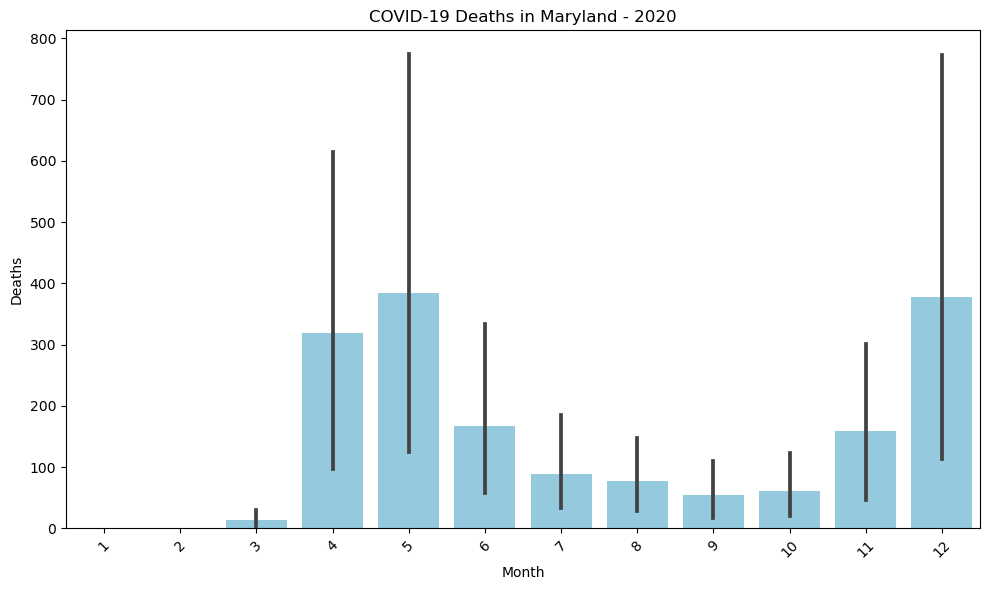

C:\Users\Bharath\AppData\Local\Temp\ipykernel_44692\1913518336.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_covid_df['Month'] = year_covid_df['Start Date'].dt.month


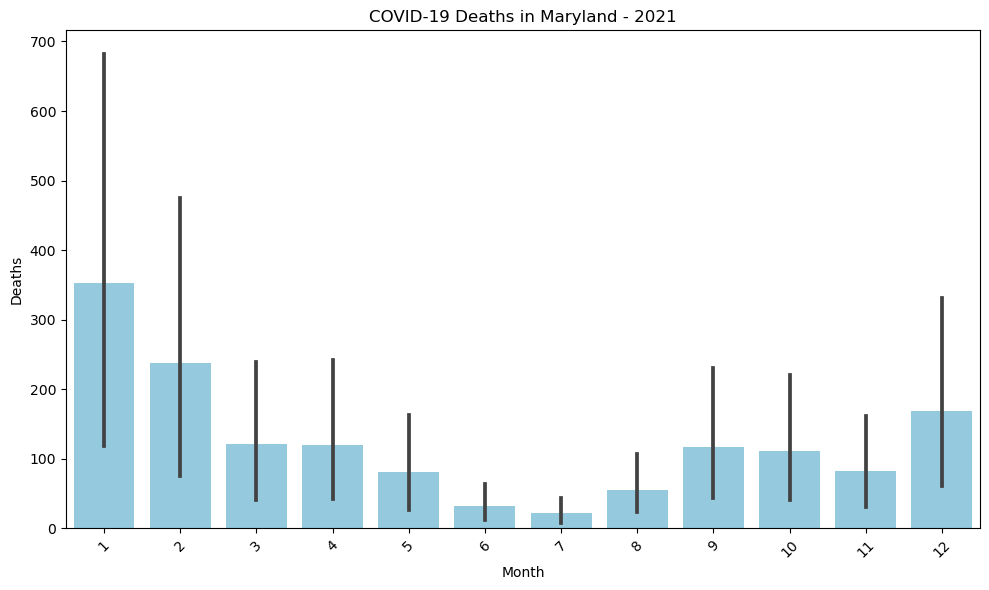

C:\Users\Bharath\AppData\Local\Temp\ipykernel_44692\1913518336.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_covid_df['Month'] = year_covid_df['Start Date'].dt.month


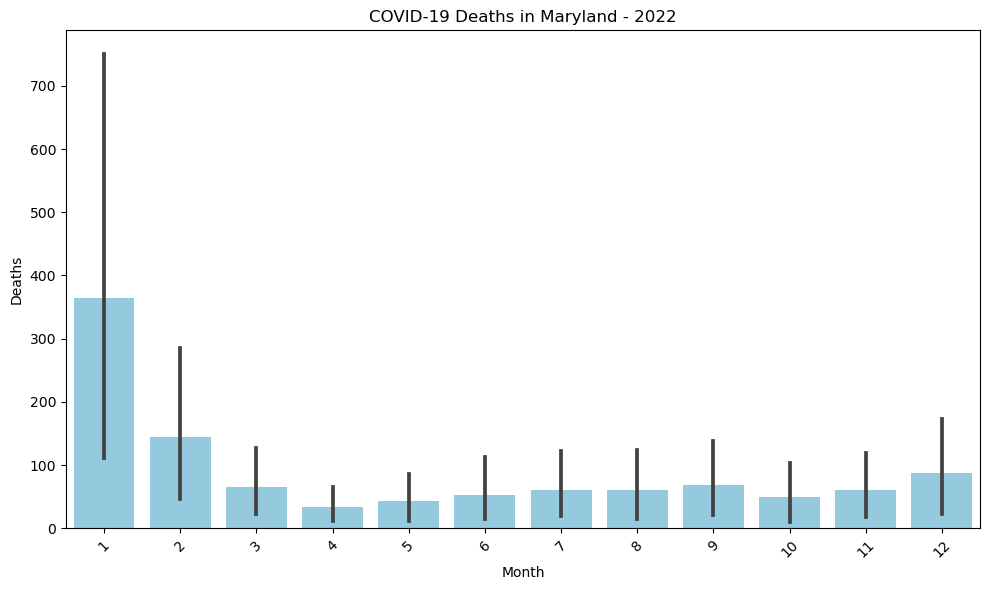

C:\Users\Bharath\AppData\Local\Temp\ipykernel_44692\1913518336.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_covid_df['Month'] = year_covid_df['Start Date'].dt.month
C:\Users\Bharath\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


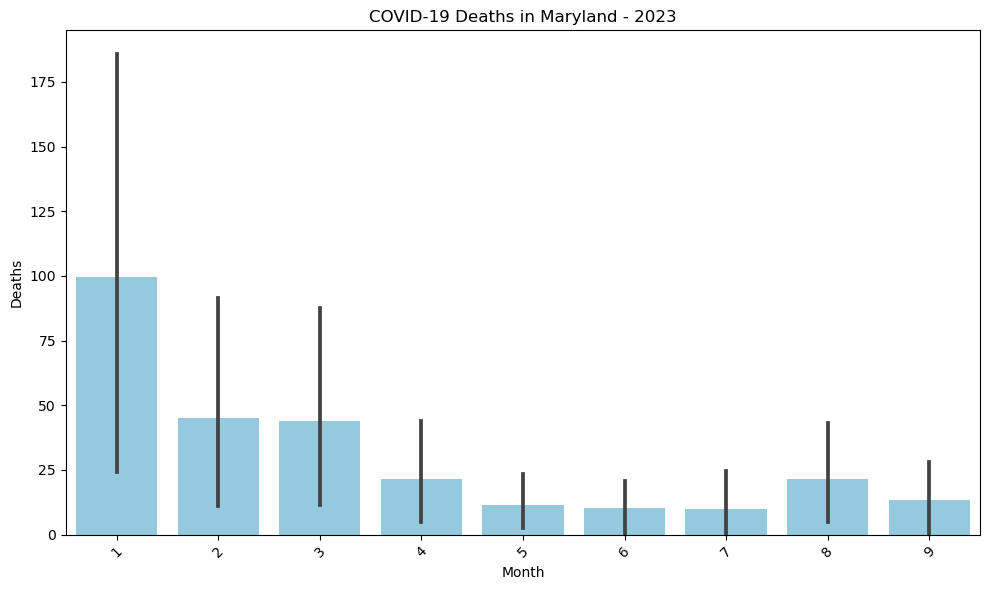

In [44]:
md_df = temp2[temp2['State'] == 'Maryland']

years = [2020, 2021, 2022, 2023]


for year in years:
    year_covid_df = md_df[(md_df['Start Date'].dt.year == year) & (md_df['Condition'] == 'COVID-19')]
    
    year_covid_df['Month'] = year_covid_df['Start Date'].dt.month
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Month', y='COVID-19 Deaths', data=year_covid_df, color='skyblue')
    plt.title(f'COVID-19 Deaths in Maryland - {year}')
    plt.xlabel('Month')
    plt.ylabel('Deaths')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [45]:
md_df

,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths
282150,2020-01-01,2020-01-31,By Month,2020.0,1.0,Maryland,Circulatory diseases,Hypertensive diseases,I10-I15,0-24,0.0
282151,2020-02-01,2020-02-29,By Month,2020.0,2.0,Maryland,Circulatory diseases,Hypertensive diseases,I10-I15,0-24,0.0
282152,2020-03-01,2020-03-31,By Month,2020.0,3.0,Maryland,Circulatory diseases,Hypertensive diseases,I10-I15,0-24,0.0
282153,2020-04-01,2020-04-30,By Month,2020.0,4.0,Maryland,Circulatory diseases,Hypertensive diseases,I10-I15,0-24,NaN
282154,2020-05-01,2020-05-31,By Month,2020.0,5.0,Maryland,Circulatory diseases,Hypertensive diseases,I10-I15,0-24,0.0
...,...,...,...,...,...,...,...,...,...,...,...
289795,2023-05-01,2023-05-31,By Month,2023.0,5.0,Maryland,COVID-19,COVID-19,U071,All Ages,43.0
289796,2023-06-01,2023-06-30,By Month,2023.0,6.0,Maryland,COVID-19,COVID-19,U071,All Ages,40.0
289797,2023-07-01,2023-07-31,By Month,2023.0,7.0,Maryland,COVID-19,COVID-19,U071,All Ages,35.0
289798,2023-08-01,2023-08-31,By Month,2023.0,8.0,Maryland,COVID-19,COVID-19,U071,All Ages,80.0


In [46]:
temp2['Condition'].value_counts()

Hypertensive diseases                       24300
Ischemic heart disease                      24300
Cardiac arrest                              24300
Cardiac arrhythmia                          24300
Heart failure                               24300
Cerebrovascular diseases                    24300
Other diseases of the circulatory system    24300
COVID-19                                    24300
Name: Condition, dtype: int64

### Displaying the COVID-19 deaths in the state of Maryland for the year 2020 based on the condition

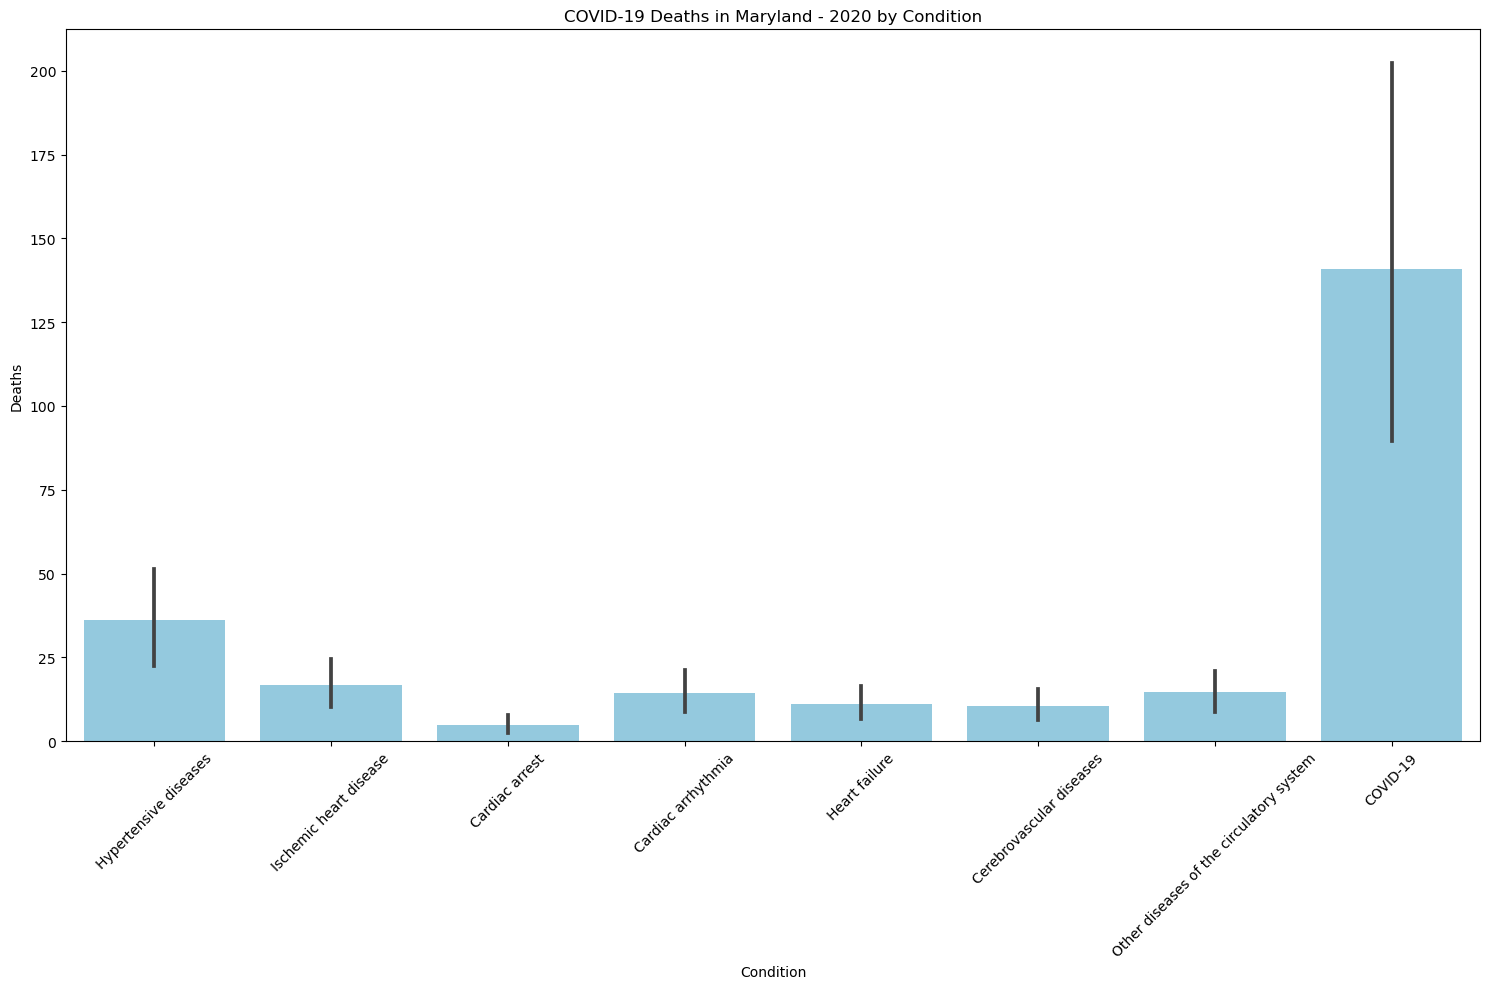

In [47]:
year_2020_df = md_df[md_df['Start Date'].dt.year == 2020]

condition_deaths_2020 = year_2020_df.groupby('Condition')['COVID-19 Deaths'].sum().reset_index()

plt.figure(figsize=(15, 10))
sns.barplot(x='Condition', y='COVID-19 Deaths', data=md_df[md_df['Start Date'].dt.year == 2020], color='skyblue')
plt.title('COVID-19 Deaths in Maryland - 2020 by Condition')
plt.xlabel('Condition')
plt.ylabel('Deaths')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Displaying the COVID-19 deaths in the state of Maryland for the year 2020 and 2021 based on the Age Group

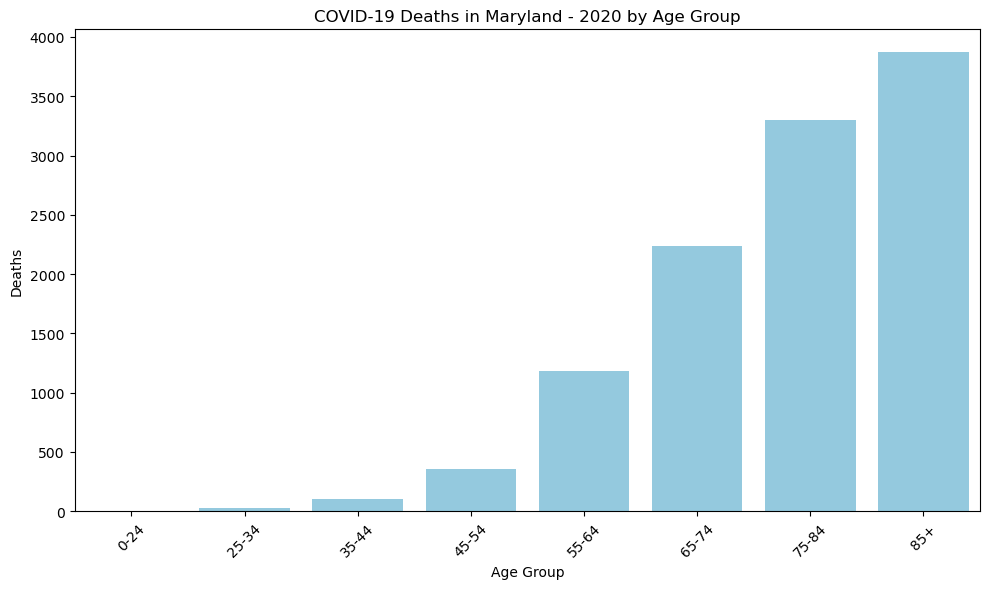

In [48]:
year_2020_filtered_df = md_df[(md_df['Start Date'].dt.year == 2020) & 
                               ~md_df['Age Group'].isin(['All Ages', 'Not stated'])]

age_group_deaths_2020 = year_2020_filtered_df.groupby('Age Group')['COVID-19 Deaths'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Age Group', y='COVID-19 Deaths', data=age_group_deaths_2020, color='skyblue')
plt.title('COVID-19 Deaths in Maryland - 2020 by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Deaths')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

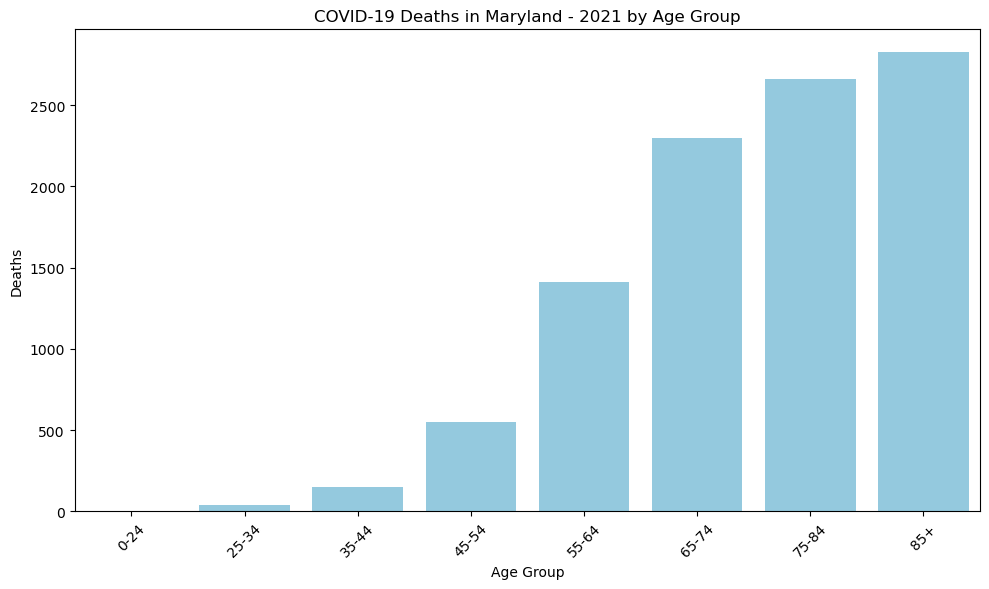

In [49]:
year_2021_filtered_df = md_df[(md_df['Start Date'].dt.year == 2021) & 
                               ~md_df['Age Group'].isin(['All Ages', 'Not stated'])]

age_group_deaths_2021 = year_2021_filtered_df.groupby('Age Group')['COVID-19 Deaths'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Age Group', y='COVID-19 Deaths', data=age_group_deaths_2021, color='skyblue')
plt.title('COVID-19 Deaths in Maryland - 2021 by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Deaths')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Displaying the COVID-19 deaths in the state of New York for the year 2021 based on the Age Group

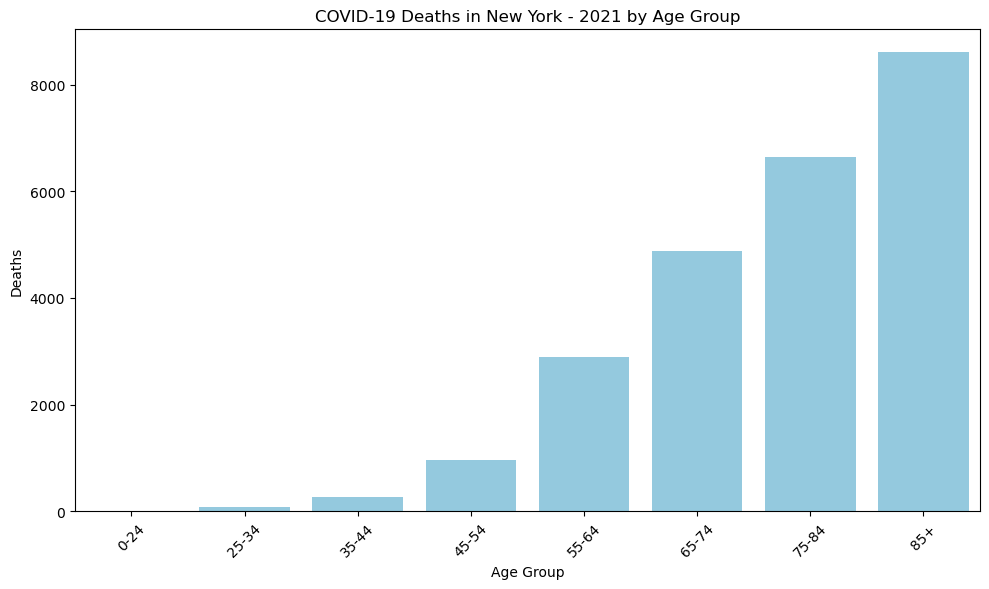

In [50]:
ny_df = temp2[temp2['State'] == 'New York']

year_2021_filtered_df = ny_df[(ny_df['Start Date'].dt.year == 2021) & 
                               ~ny_df['Age Group'].isin(['All Ages', 'Not stated'])]

age_group_deaths_2021 = year_2021_filtered_df.groupby('Age Group')['COVID-19 Deaths'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Age Group', y='COVID-19 Deaths', data=age_group_deaths_2021, color='skyblue')
plt.title('COVID-19 Deaths in New York - 2021 by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Deaths')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Displaying the COVID-19 deaths in the state of California for the year 2021 based on the Age Group

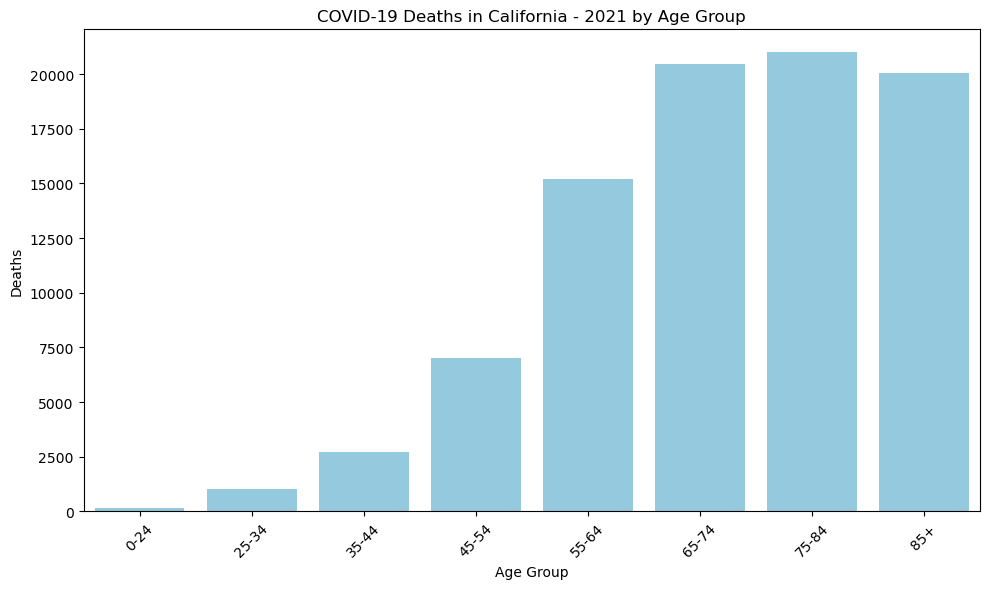

In [51]:
cal_df = temp2[temp2['State'] == 'California']

year_2021_filtered_df = cal_df[(cal_df['Start Date'].dt.year == 2021) & 
                               ~cal_df['Age Group'].isin(['All Ages', 'Not stated'])]

age_group_deaths_2021 = year_2021_filtered_df.groupby('Age Group')['COVID-19 Deaths'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Age Group', y='COVID-19 Deaths', data=age_group_deaths_2021, color='skyblue')
plt.title('COVID-19 Deaths in California - 2021 by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Deaths')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Visualizing the COVID-19 deaths in the country for the year 2020 based on the Condition

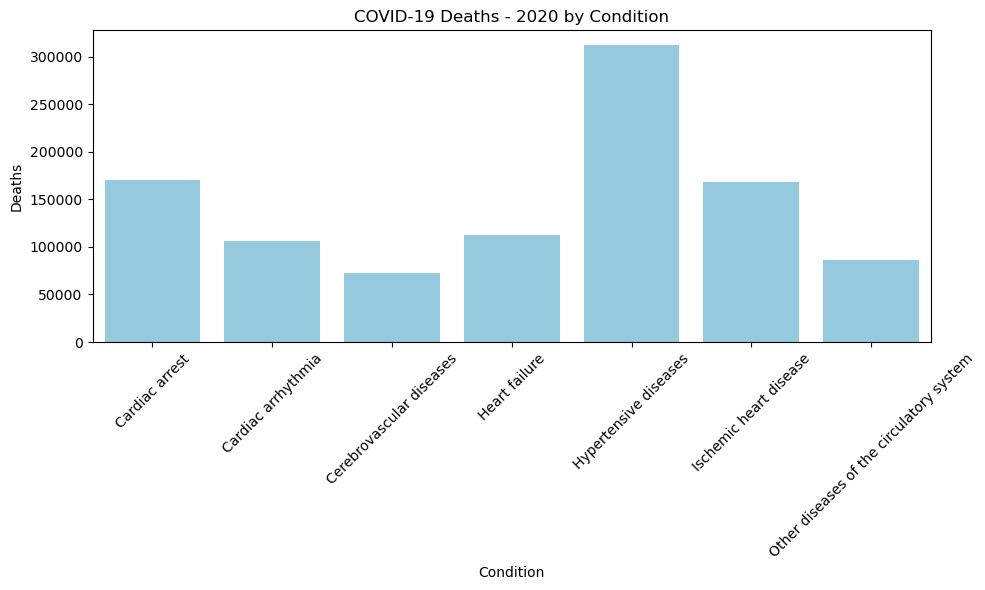

In [52]:
year_2020_filtered_df = temp2[(temp2['Start Date'].dt.year == 2020) & 
                           (temp2['Condition'] != 'COVID-19')]

condition_deaths_2020 = year_2020_filtered_df.groupby('Condition')['COVID-19 Deaths'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Condition', y='COVID-19 Deaths', data=condition_deaths_2020, color='skyblue')
plt.title('COVID-19 Deaths - 2020 by Condition')
plt.xlabel('Condition')
plt.ylabel('Deaths')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [53]:
temp2

,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths
64800,2020-01-01,2020-01-31,By Month,2020.0,1.0,United States,Circulatory diseases,Hypertensive diseases,I10-I15,0-24,0.0
64801,2020-02-01,2020-02-29,By Month,2020.0,2.0,United States,Circulatory diseases,Hypertensive diseases,I10-I15,0-24,0.0
64802,2020-03-01,2020-03-31,By Month,2020.0,3.0,United States,Circulatory diseases,Hypertensive diseases,I10-I15,0-24,0.0
64803,2020-04-01,2020-04-30,By Month,2020.0,4.0,United States,Circulatory diseases,Hypertensive diseases,I10-I15,0-24,6.0
64804,2020-05-01,2020-05-31,By Month,2020.0,5.0,United States,Circulatory diseases,Hypertensive diseases,I10-I15,0-24,3.0
...,...,...,...,...,...,...,...,...,...,...,...
620995,2023-05-01,2023-05-31,By Month,2023.0,5.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,67.0
620996,2023-06-01,2023-06-30,By Month,2023.0,6.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,122.0
620997,2023-07-01,2023-07-31,By Month,2023.0,7.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,114.0
620998,2023-08-01,2023-08-31,By Month,2023.0,8.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,78.0


### Visualizing the COVID-19 deaths in the country based on the Age Group

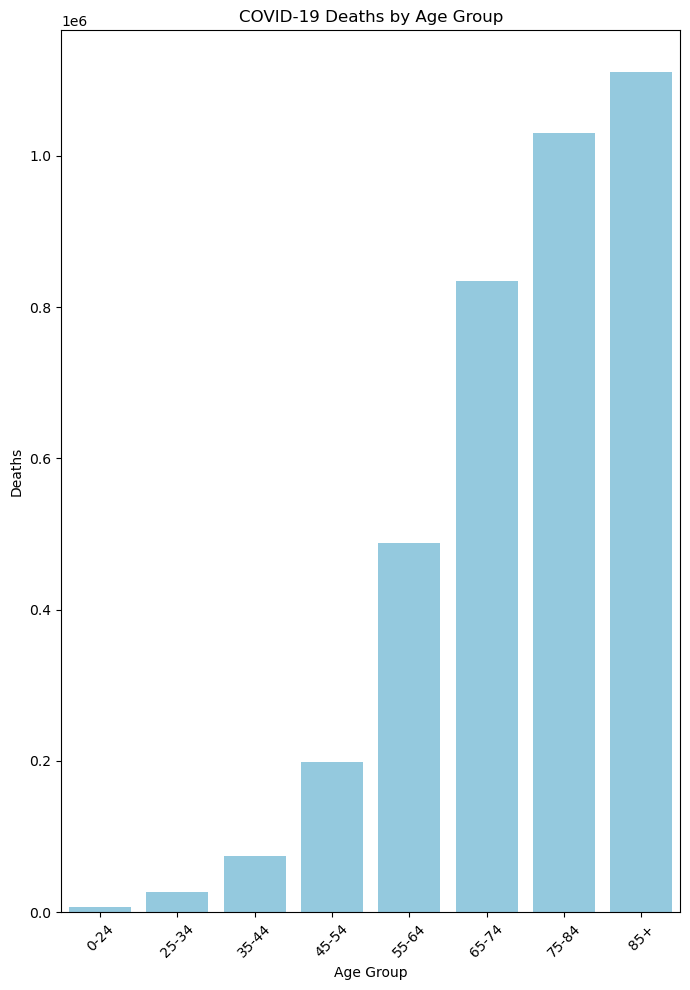

In [54]:
year_2021_filtered_df = temp2[~temp2['Age Group'].isin(['All Ages', 'Not stated'])]

age_group_deaths_2021 = year_2021_filtered_df.groupby('Age Group')['COVID-19 Deaths'].sum().reset_index()

plt.figure(figsize=(7, 10))
sns.barplot(x='Age Group', y='COVID-19 Deaths', data=age_group_deaths_2021, color='skyblue')
plt.title('COVID-19 Deaths by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Deaths')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [55]:
temp2.describe()

,Year,Month,COVID-19 Deaths
count,194400.000000,194400.00000,134802.000000
mean,2021.400000,6.20000,57.066794
std,1.083208,3.35063,781.191591
min,2020.000000,1.00000,0.000000
25%,2020.000000,3.00000,0.000000
50%,2021.000000,6.00000,0.000000
75%,2022.000000,9.00000,15.000000
max,2023.000000,12.00000,105566.000000


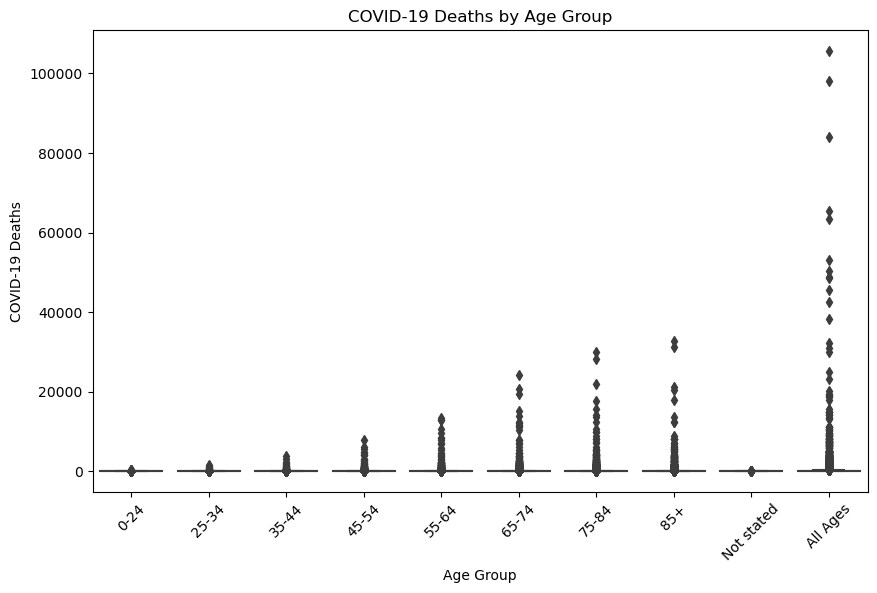

In [56]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age Group', y='COVID-19 Deaths', data=temp2)
plt.title('COVID-19 Deaths by Age Group')
plt.xlabel('Age Group')
plt.ylabel('COVID-19 Deaths')
plt.xticks(rotation=45)
plt.show()

In [57]:
condition_deaths = temp2.groupby('Condition')['COVID-19 Deaths'].sum().reset_index()
print("\nTotal COVID-19 Deaths by Condition:")
print(condition_deaths)


Total COVID-19 Deaths by Condition:
                                  Condition  COVID-19 Deaths
0                                  COVID-19        4574757.0
1                            Cardiac arrest         517954.0
2                        Cardiac arrhythmia         351199.0
3                  Cerebrovascular diseases         222226.0
4                             Heart failure         368454.0
5                     Hypertensive diseases         831793.0
6                    Ischemic heart disease         489773.0
7  Other diseases of the circulatory system         336562.0


In [58]:
age_group_deaths = temp2.groupby('Age Group')['COVID-19 Deaths'].mean().reset_index()
print("\nAverage COVID-19 Deaths by Age Group:")
print(age_group_deaths)


Average COVID-19 Deaths by Age Group:
    Age Group  COVID-19 Deaths
0        0-24         0.428125
1       25-34         1.705210
2       35-44         5.492116
3       45-54        17.252085
4       55-64        47.106001
5       65-74        80.472720
6       75-84        94.682792
7         85+        98.537451
8    All Ages       272.740457
9  Not stated         0.002010


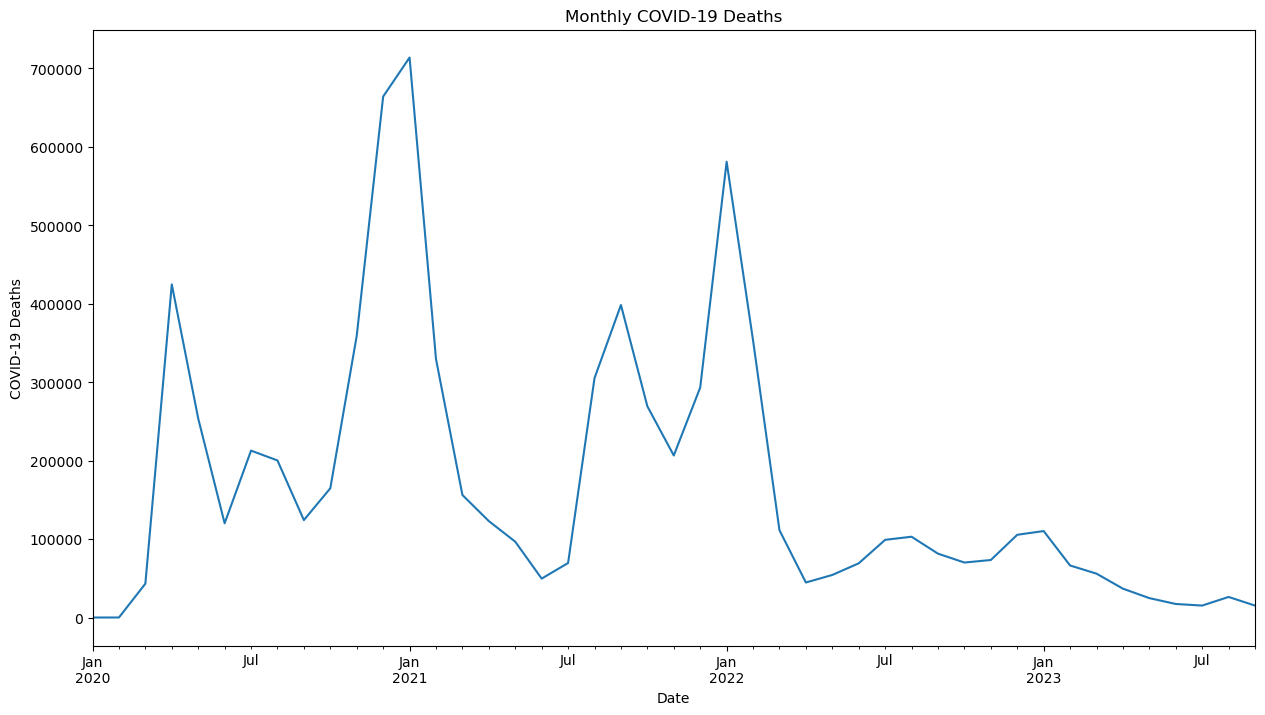

In [59]:
plt.figure(figsize=(15, 8))
monthly_deaths = temp2.resample('M', on='Start Date')['COVID-19 Deaths'].sum()
monthly_deaths.plot()
plt.title('Monthly COVID-19 Deaths')
plt.xlabel('Date')
plt.ylabel('COVID-19 Deaths')
plt.show()

### Visualization of the monthly COVID-19 deaths from 2020 till 2023 based on the State

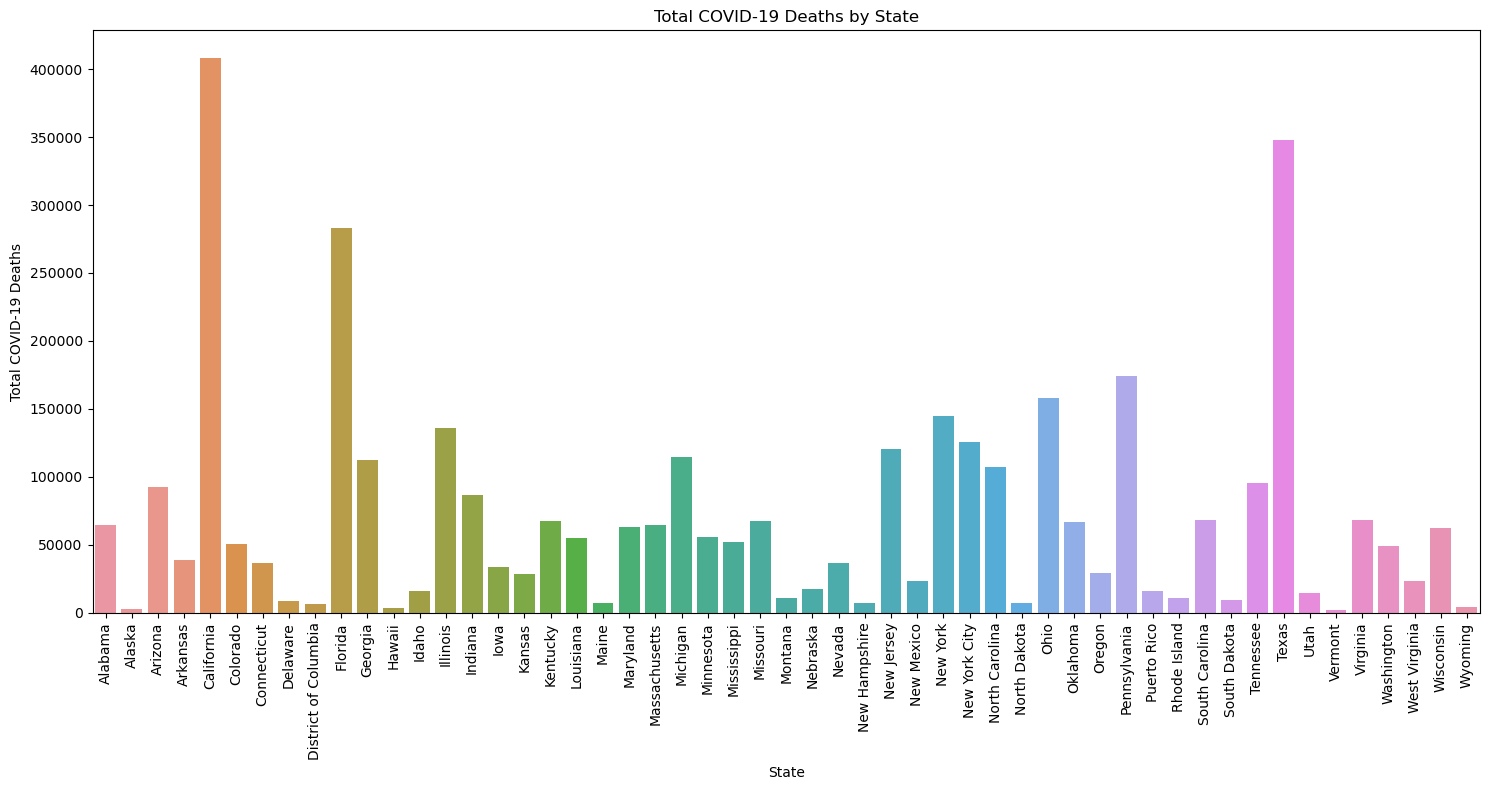

In [60]:
fil_df = temp2[temp2['State'] != 'United States']

state_deaths = fil_df.groupby('State')['COVID-19 Deaths'].sum().reset_index()

plt.figure(figsize=(15, 8))
sns.barplot(x='State', y='COVID-19 Deaths', data=state_deaths)
plt.title('Total COVID-19 Deaths by State')
plt.xlabel('State')
plt.ylabel('Total COVID-19 Deaths')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

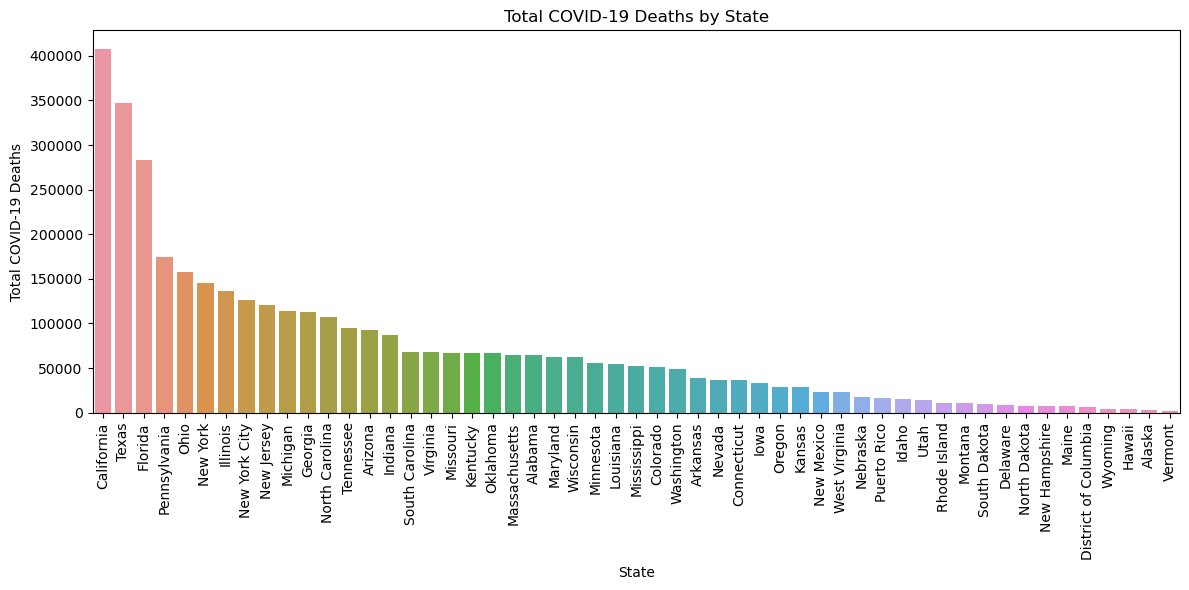

In [61]:
state_deaths_sorted = state_deaths.sort_values(by='COVID-19 Deaths', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='State', y='COVID-19 Deaths', data=state_deaths_sorted)
plt.title('Total COVID-19 Deaths by State')
plt.xlabel('State')
plt.ylabel('Total COVID-19 Deaths')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Visualization of the monthly COVID-19 deaths from 2020 till 2023 based on the Condition

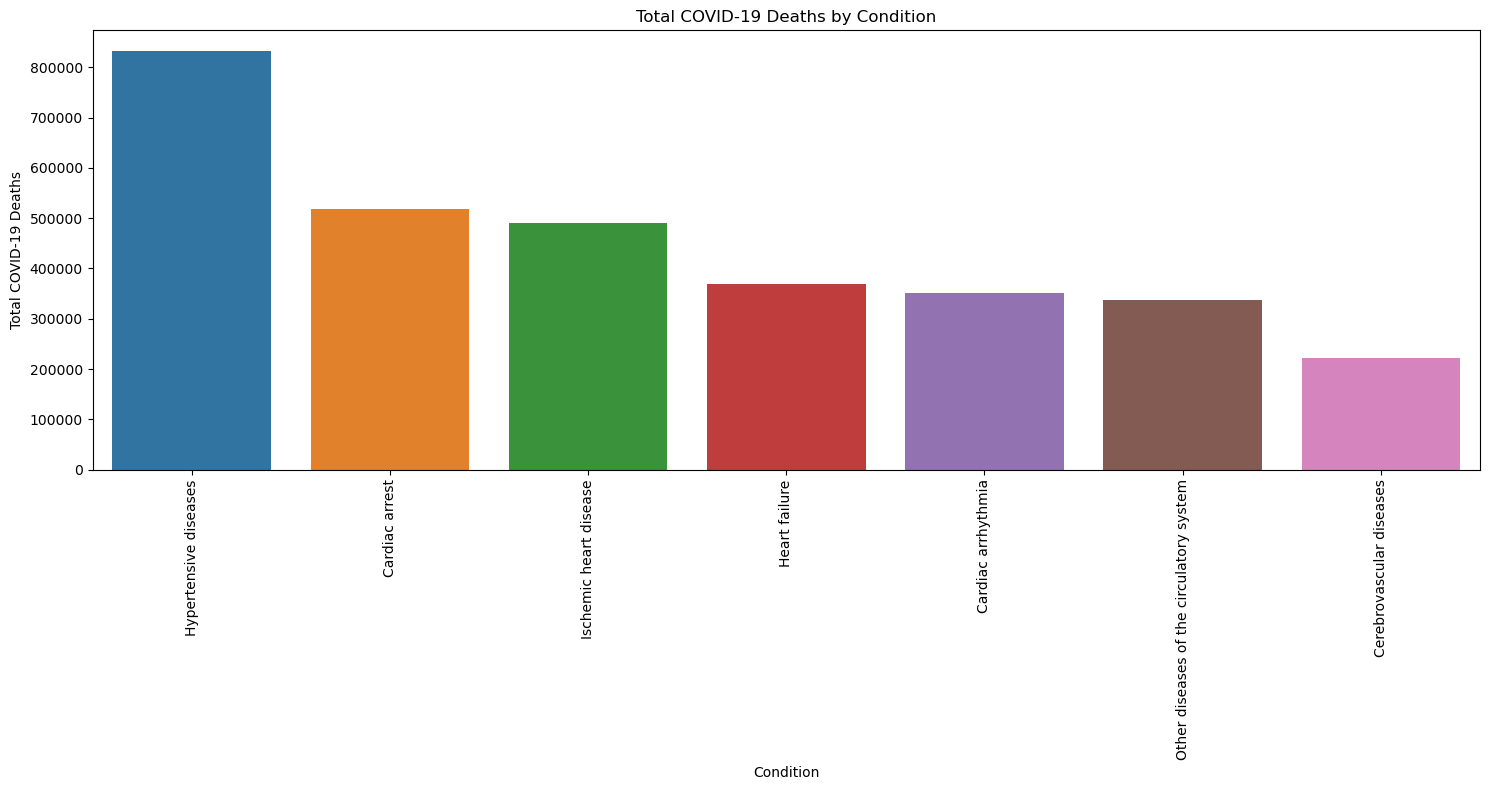

In [62]:
fil2 = temp2[temp2['Condition'] != 'COVID-19']

condition_deaths = fil2.groupby('Condition')['COVID-19 Deaths'].sum().reset_index()
condition_deaths = condition_deaths.sort_values(by='COVID-19 Deaths', ascending=False)

plt.figure(figsize=(15, 8))
sns.barplot(x='Condition', y='COVID-19 Deaths', data=condition_deaths)
plt.title('Total COVID-19 Deaths by Condition')
plt.xlabel('Condition')
plt.ylabel('Total COVID-19 Deaths')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Displaying the total COVID-19 deaths based on the Age Group for different heart conditions

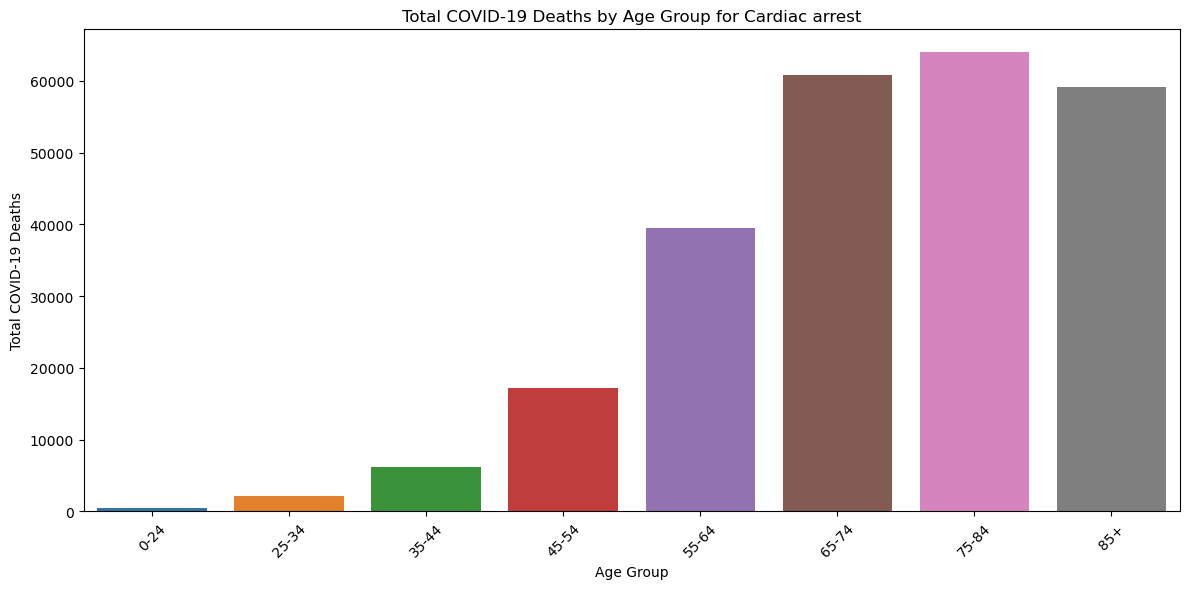

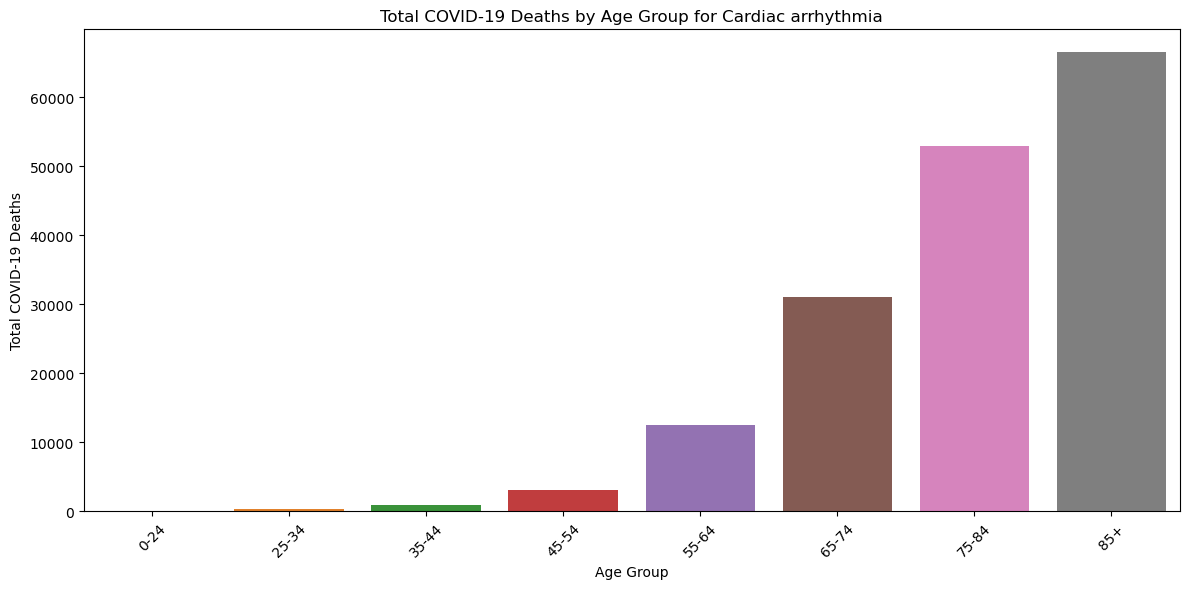

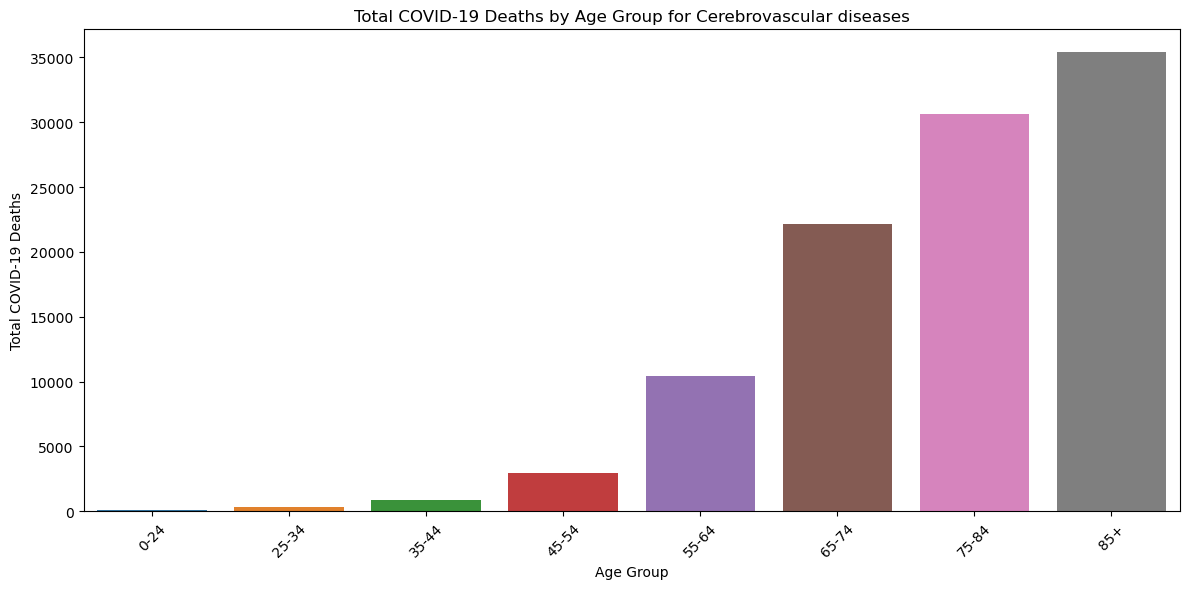

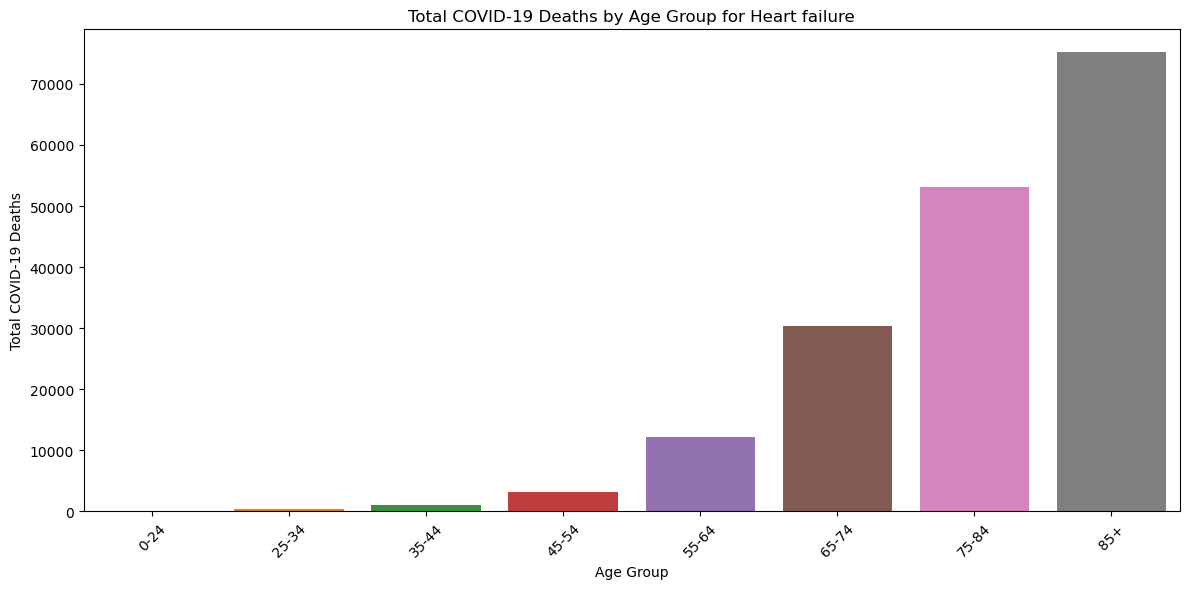

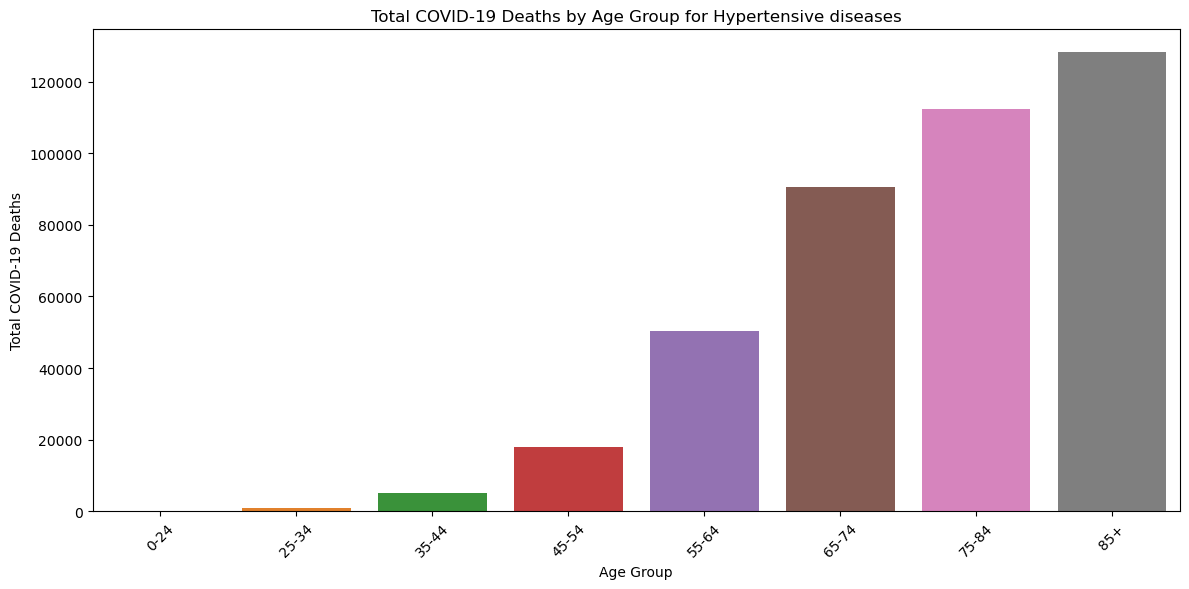

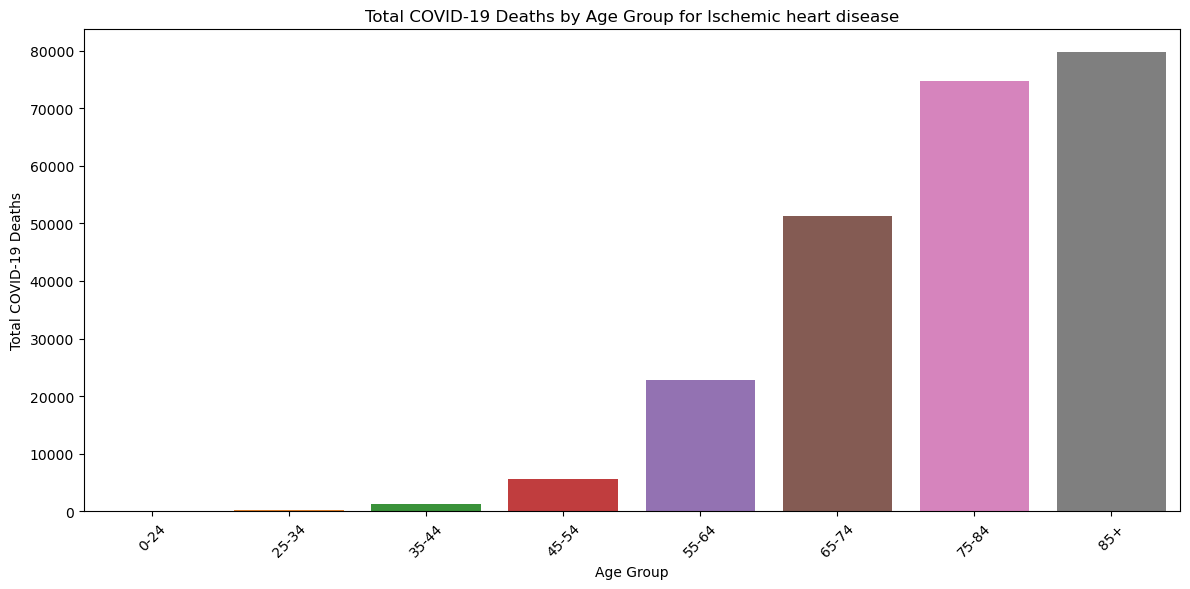

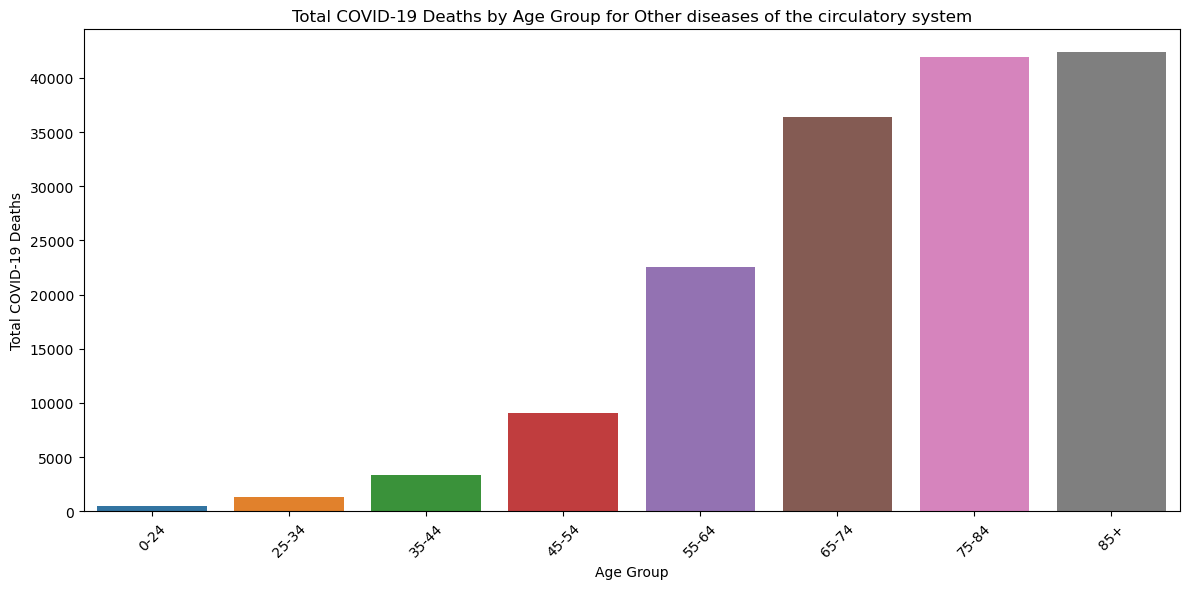

In [63]:
filtered_df = temp2[(temp2['Condition'] != 'COVID-19') & 
                    (~temp2['Age Group'].isin(['All Ages', 'Not stated']))]

condition_age_deaths = filtered_df.groupby(['Condition', 'Age Group'])['COVID-19 Deaths'].sum().reset_index()

for condition in condition_age_deaths['Condition'].unique():
    condition_data = condition_age_deaths[condition_age_deaths['Condition'] == condition]
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Age Group', y='COVID-19 Deaths', data=condition_data)
    plt.title(f'Total COVID-19 Deaths by Age Group for {condition}')
    plt.xlabel('Age Group')
    plt.ylabel('Total COVID-19 Deaths')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()